Curso de Big Data
==============================

Trabajo práctico 3
------------------------------

### Grupo: Armas Braithwaite, Fernández, Menta, Vargas Ochuza

#### Parte 1: Análisis de la base de hogares y cálculo de pobreza
##### Ahora que ya se han familiarizado con la Encuesta Permanente de Hogares (EPH) y con la tabla de adulto equivalente, vamos a complejizar un poco la construcción del índice de pobreza. Lo calcularemos a nivel de hogares, con sus respectivos factores de expansioón y realizaremos una limpieza de la base con mayor dedicación. A continuación, complementamos el trabajo hecho en el TP2 usando la encuesta a nivel hogares de la EPH.

##### Inciso 1
##### Exploren el diseño de registro de la base de hogar: a priori, ¿qué variables creen que pueden ser muy predictivas de pobreza y que sería muy útil incluir para perfeccionar el ejercicio del TP2?

###### Las variables relevantes para explicar la pobreza creemos que son las siguientes:
###### - ITF_hogar (Monto de ingreso total familiar)}: Evalúa la disponibilidad de recursos económicos en el hogar, lo que está estrechamente relacionado con la pobreza.
###### - Región (REGION): La ubicación geográfica de un hogar puede tener un impacto significativo en su nivel de vida y acceso a recursos. Por lo tanto, la región en la que se encuentra el hogar es una variable importante.
###### - Características de la vivienda (IV2, IV3, IV6, IV8, IV10, IV12_1, IV_12_2, IV12_3): Estas variables describen aspectos de la vivienda, como el número de habitaciones, el estado del piso, el acceso a agua, la presencia de baño, la proximidad a basurales, zonas inundables y villas de emergencia. Estas características pueden estar relacionadas con la calidad de vida y el nivel de pobreza.
###### Características habitacionales del hogar (II1, II7, II8, II9): Estas variables describen el número de habitaciones en el hogar, el régimen de tenencia de la vivienda y el tipo de combustible utilizado para cocinar.
###### Estrategias del hogar (V1, V2, V4, V5, V6, V12, V14, V17): Estas variables exploran cómo las personas del hogar obtienen ingresos y si han tenido que recurrir a estrategias como pedir préstamos, vender pertenencias o recibir ayuda social. Estas estrategias pueden indicar la vulnerabilidad económica del hogar.
###### Resumen del hogar (IX_TOT): La cantidad de miembros en el hogar es un factor importante para evaluar la pobreza, ya que un hogar con más miembros puede requerir más recursos para satisfacer sus necesidades básicas.
###### IPCF_hogar (Monto de ingreso per cápita familiar): Proporciona información sobre los recursos disponibles por persona en el hogar, lo que está relacionado con la pobreza.

##### Inciso 2
##### Descarguen la base de microdatos de la EPH correspondiente al primer trimestre de 2023 (la base de hogares se llama usu hogar T123.xls). Importen los datos de la encuesta de hogar y, al igual que en el TP2, conserven sólo las observaciones que corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o del Gran Buenos Aires

In [1]:
# Importamos el módulo necesario para trabajar con la base de datos y otros propositos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Seteamos el directorio donde vamos a trabajar
import os

#os.chdir("C:/Users/bauti/OneDrive/Documentos/Escritorio/Big Data/TP2/EPH_usu_1er_Trim_2023_xlsx")
os.chdir("C:/Users/Paula/Documents/BIGDATA/TPs_BigData/TP3")

In [3]:
# Cargamos las bases
microdata_hogar = pd.read_excel("usu_hogar_T123.xlsx")

In [4]:
microdata_indv = pd.read_excel("usu_individual_T123.xlsx")

In [5]:
# Del diccionario de variables sabemos que tenemos que quedarnos solamente con los valores 32 y 33
# que son los correspondientes a Ciudad Autónoma de Buenos Aires o Gran Buenos Aires.

# Filtramos el dataframe y lo renombramos
microdata_indv_filtered = microdata_indv[(microdata_indv['AGLOMERADO'] == 32) | (microdata_indv['AGLOMERADO'] == 33)]
len(microdata_indv_filtered)

7619

In [6]:
# Filtramos el dataframe y lo renombramos
microdata_hogar_filtered = microdata_hogar[(microdata_hogar['AGLOMERADO'] == 32) | (microdata_hogar['AGLOMERADO'] == 33)]
len(microdata_hogar_filtered)


2736

##### Inciso 3: Unan la tabla de la encuesta individual con la de la encuesta de hogar.

In [7]:
# Realizamos un inner join de las bases para quedarnos solo con las filas cuyo identificador de hogar se encuentre en ambas bases
# Importante remarcar que hacemos el merge por vivienda y hogar! ya que pueden haber 2 viviendas en un mismo hogar.

merged_microdata = microdata_indv_filtered.merge(microdata_hogar_filtered, on=['CODUSU', "NRO_HOGAR"], how='inner')

# Renombrar las columnas con sufijo "_x" a "_indv"
merged_microdata.rename(columns=lambda x: x.replace("_x", "_indv"), inplace=True)

# Renombrar las columnas con sufijo "_y" a "_hogar"
merged_microdata.rename(columns=lambda x: x.replace("_y", "_hogar"), inplace=True)

# Esto ultimo no es particularmente necesario pues muchos de los valores son duplicados.

In [8]:
# Chequeamos la dimension
len(merged_microdata)

7619

##### Inciso 4: Generen sus propias funciones para limpiar la base de datos o, si deciden utilizar funciones existentes en paquetes como numpy y pandas, mencionen cuáles usarán y de qué paquetes son.
##### &
##### Inciso 5: Limpien la base de datos tomando criterios que hagan sentido, tanto para el tratamiento de valores faltantes, de outliers, como así también decidan qué variables categóricas y strings usarían y transfórmenlas de forma que haga sentido para los ejercicios siguientes. Justifiquen sus decisiones.

In [9]:
# Identificar variables con NaN y contar cuántos NaN
# Utilizamos funciones de Pandas para identificar y limpiar NaN.

variables_con_nan = merged_microdata.columns[merged_microdata.isna().any()].tolist()
conteo_de_nans = merged_microdata[variables_con_nan].isna().sum()

# Imprimir las variables con NaN y la cantidad de NaN en cada una
for variable in variables_con_nan:
    print(f'Variable: {variable}, Cantidad de NaN: {conteo_de_nans[variable]}')

Variable: CH08, Cantidad de NaN: 1
Variable: CH14, Cantidad de NaN: 3959
Variable: CH15_COD, Cantidad de NaN: 6248
Variable: CH16_COD, Cantidad de NaN: 7515
Variable: IMPUTA, Cantidad de NaN: 7548
Variable: PP03C, Cantidad de NaN: 4096
Variable: PP03D, Cantidad de NaN: 4096
Variable: PP3E_TOT, Cantidad de NaN: 4096
Variable: PP3F_TOT, Cantidad de NaN: 4096
Variable: PP03G, Cantidad de NaN: 4096
Variable: PP03H, Cantidad de NaN: 4096
Variable: PP03I, Cantidad de NaN: 4096
Variable: PP03J, Cantidad de NaN: 4096
Variable: INTENSI, Cantidad de NaN: 4096
Variable: PP04A, Cantidad de NaN: 4096
Variable: PP04B_COD, Cantidad de NaN: 4096
Variable: PP04B1, Cantidad de NaN: 4096
Variable: PP04B2, Cantidad de NaN: 4096
Variable: PP04B3_MES, Cantidad de NaN: 4096
Variable: PP04B3_ANO, Cantidad de NaN: 4096
Variable: PP04B3_DIA, Cantidad de NaN: 4096
Variable: PP04C, Cantidad de NaN: 4096
Variable: PP04C99, Cantidad de NaN: 4096
Variable: PP04D_COD, Cantidad de NaN: 4096
Variable: PP04G, Cantidad d

In [10]:
# Establecer el umbral de 3500 para determinar qué columnas eliminar
umbral = 3500

# Eliminar columnas con más de 3500 valores NaN
# Utilizamos la funcion de Pandas dropna

merged_microdata = merged_microdata.dropna(thresh=umbral, axis=1)
merged_microdata.head(2)

,CODUSU,ANO4_indv,TRIMESTRE_indv,NRO_HOGAR,COMPONENTE,H15,REGION_indv,MAS_500_indv,AGLOMERADO_indv,PONDERA_indv,...,RDECCFR_hogar,GDECCFR_hogar,ADECCFR_hogar,PONDIH_hogar,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,1,1,1,S,33,1545,...,5,5.0,6,2540,1,0,2,0,0,0
1,TQRMNORUYHLMSMCDEIJAH00719364,2023,1,1,2,1,1,S,33,1545,...,5,5.0,6,2540,1,0,2,0,0,0


In [11]:
# Definimos las variables que deseamos filtrar
variables = ['ITF_hogar', 'ITF_indv', 'IPCF_hogar', 'IPCF_indv', 'P21', 'P47T']

# Definir el umbral del percentil (en este caso, 97%)
percentile_threshold = 0.97

# Iterar sobre las variables y aplicar el filtrado utlizando Pandas.
for variable in variables:
    # Calcular el percentil umbral
    percentile_value = merged_microdata[variable].quantile(percentile_threshold)
    
    # Filtrar el DataFrame para mantener solo los valores por debajo del percentil
    merged_microdata = merged_microdata[merged_microdata[variable] <= percentile_value]

len(merged_microdata)

6363

In [12]:
# Limpiamos algunas variables con valores especificos utlizando Pandas

merged_microdata = merged_microdata[merged_microdata['CH08'] != 9]
merged_microdata = merged_microdata[merged_microdata['IV2'] != 99]
merged_microdata = merged_microdata[merged_microdata['II1'] != 99]
merged_microdata = merged_microdata[merged_microdata['II9'] > 0]
merged_microdata = merged_microdata[merged_microdata['ITF_hogar'] >= 0]
merged_microdata = merged_microdata[merged_microdata['ITF_indv'] >= 0]
merged_microdata = merged_microdata[merged_microdata['IPCF_hogar'] >= 0]
merged_microdata = merged_microdata[merged_microdata['IPCF_indv'] >= 0]


len(merged_microdata)

6335

##### Inciso 6: Presenten estadísticas descriptivas de cinco variables de la encuesta de hogar que ustedes creen que pueden ser relevantes para predecir pobreza.

**IV8** Tiene baño

**IV3** Piso interior de la casa

**V4** La cubierta exterior del techo es de...

**IV11** El desague del baño es...

**IPCF_hogar** Monto de ingreso per cápita familiar del hogar

##### Separamos el analisis entre categoricas y no categoricas.

In [13]:
merged_microdata['IPCF_hogar'].describe().T

count      6335.000000
mean      25048.015656
std       32095.284287
min           0.000000
25%           0.000000
50%           0.000000
75%       45480.000000
max      125000.000000
Name: IPCF_hogar, dtype: float64

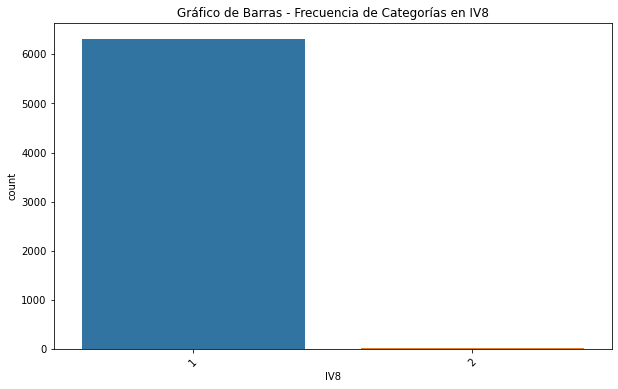

Porcentaje de cada categoría en IV8:
1    99.73165
2     0.26835
Name: IV8, dtype: float64



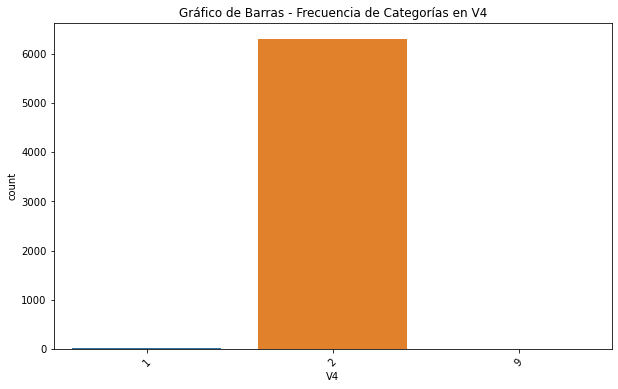

Porcentaje de cada categoría en V4:
2    99.526440
1     0.347277
9     0.126283
Name: V4, dtype: float64



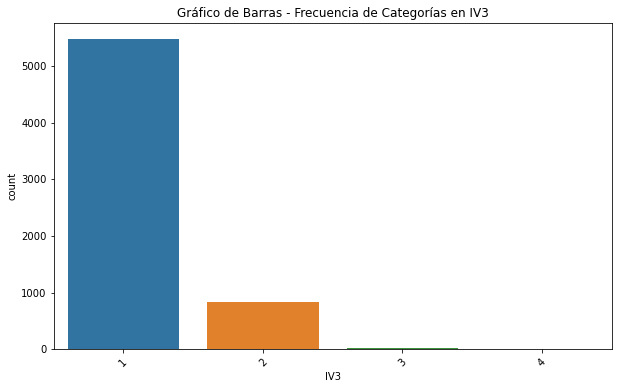

Porcentaje de cada categoría en IV3:
1    86.566693
2    13.149171
3     0.205209
4     0.078927
Name: IV3, dtype: float64



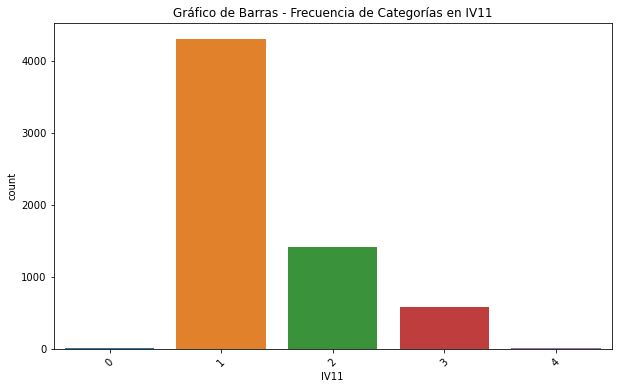

Porcentaje de cada categoría en IV11:
1    68.034728
2    22.304657
3     9.171271
0     0.268350
4     0.220994
Name: IV11, dtype: float64



In [14]:
variables = ['IV8', 'V4', 'IV3', 'IV11']

for var in variables:
    # Conteo de frecuencias
    conteo_frecuencias = merged_microdata[var].value_counts()

    # Gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.countplot(data=merged_microdata, x=var)
    plt.title(f'Gráfico de Barras - Frecuencia de Categorías en {var}')
    plt.xticks(rotation=45)
    plt.show()

    # Porcentaje de cada categoría
    porcentaje = merged_microdata[var].value_counts(normalize=True) * 100
    print(f"Porcentaje de cada categoría en {var}:")
    print(porcentaje)
    print()

In [15]:
# Armamos una función para no tener que lidiar con el tedioso uso del archivo de Excel.

# Esta función, asignar_valor, toma dos argumentos, edad y genero, y asigna un valor numérico basado en reglas condicionales
# que dependen de estos dos argumentos. Las condiciones se prueban en orden y, cuando se encuentra una coincidencia, se
# devuelve un valor específico. Si no se cumple ninguna condición, la función devuelve None.
#Las condiciones están diseñadas para categorizar a las personas en grupos según su edad y género y asignarles un valor numérico basado en esas categorías.

def asignar_valor(edad, genero):
    if edad < 1:
        if genero == 2:
            return 0.35
        elif genero == 1:
            return 0.35
    elif edad == 1:
        if genero == 2:
            return 0.37
        elif genero == 1:
            return 0.37
    elif edad == 2:
        if genero == 2:
            return 0.46
        elif genero == 1:
            return 0.46
    elif edad == 3:
        if genero == 2:
            return 0.51
        elif genero == 1:
            return 0.51
    elif edad == 4:
        if genero == 2:
            return 0.55
        elif genero == 1:
            return 0.55
    elif edad == 5:
        if genero == 2:
            return 0.60
        elif genero == 1:
            return 0.60
    elif edad == 6:
        if genero == 2:
            return 0.64
        elif genero == 1:
            return 0.64
    elif edad == 7:
        if genero == 2:
            return 0.66
        elif genero == 1:
            return 0.66
    elif edad == 8:
        if genero == 2:
            return 0.68
        elif genero == 1:
            return 0.68
    elif edad == 9:
        if genero == 2:
            return 0.69
        elif genero == 1:
            return 0.69
    elif edad == 10:
        if genero == 2:
            return 0.70
        elif genero == 1:
            return 0.79
    elif edad == 11:
        if genero == 2:
            return 0.72
        elif genero == 1:
            return 0.82
    elif edad == 12:
        if genero == 2:
            return 0.74
        elif genero == 1:
            return 0.85
    elif edad == 13:
        if genero == 2:
            return 0.76
        elif genero == 1:
            return 0.90
    elif edad == 14:
        if genero == 2:
            return 0.76
        elif genero == 1:
            return 0.96
    elif edad == 15:
        if genero == 2:
            return 0.77
        elif genero == 1:
            return 1.00
    elif edad == 16:
        if genero == 2:
            return 0.77
        elif genero == 1:
            return 1.03
    elif edad == 17:
        if genero == 2:
            return 0.77
        elif genero == 1:
            return 1.04
    elif 18 <= edad <= 29:
        if genero == 2:
            return 0.76
        elif genero == 1:
            return 1.02
    elif 30 <= edad <= 45:
        if genero == 2:
            return 0.77
        elif genero == 1:
            return 1.00
    elif 46 <= edad <= 60:
        if genero == 2:
            return 0.76
        elif genero == 1:
            return 1.00
    elif 61 <= edad <= 75:
        if genero == 2:
            return 0.67
        elif genero == 1:
            return 0.83
    elif edad > 75:
        if genero == 2:
            return 0.63
        elif genero == 1:
            return 0.74
    else:
        return None  # En caso de que no haya una combinación válida

##### Inciso 7: Repitan el inciso 1.2.f del TP2 para construir la columna adulto equiv y la columna ad equiv hogar (pueden utilizar su código del TP2).

In [16]:
# Aplicamos la funcion al data frame. Creamos una nueva columna llamada 'adulto_equiv' en el DataFrame 'microdata_filtered', donde se calculan y asignan valores equivalentes para adultos
# a partir de las edades ('CH06') y géneros ('CH04') de cada fila utilizando una función llamada 'asignar_valor'.

merged_microdata['adulto_equiv'] = merged_microdata.apply(lambda row: asignar_valor(row['CH06'], row['CH04']), axis=1)

In [17]:
# Limpiamos y Renombramos

merged_microdata = merged_microdata.dropna(subset=['adulto_equiv'])

result = merged_microdata.groupby(by=['CODUSU','NRO_HOGAR']).agg({'adulto_equiv': 'sum'}).reset_index()
result.rename(columns={'adulto_equiv': 'ad_equiv_hogar'}, inplace=True)

merged_microdata_FINAL = pd.merge(merged_microdata, result[['CODUSU','NRO_HOGAR', 'ad_equiv_hogar']],
                     on=['CODUSU','NRO_HOGAR'],
                     how='left')

##### Inciso 8: Repitan el inciso 1.3 y 1.4 del TP2 para dividir la base en dos dataframes donde: uno conserve las personas que no reportaron ITF (dataframe llamado respondieron) y otro conserve a las personas que no reportaron ITF (llamado norespondieron). Además, agreguen a la base respondieron una columna llamada ingreso necesario que sea el producto de la canasta básica por ad equiv hogar.

In [18]:
# Definimos ambas bases según los criterios del enunciado, comprobando la condición sobre ITF.
# Imprimimos la longitud del DataFrame para obtener las cantidades.

# Reemplazar NaN por ceros en ITF_indv e ITF_hogar
merged_microdata['ITF_indv'].fillna(0, inplace=True)
merged_microdata['ITF_hogar'].fillna(0, inplace=True)

respondieron = merged_microdata_FINAL[(merged_microdata_FINAL['ITF_indv'] != 0) | (merged_microdata_FINAL['ITF_hogar'] != 0)]
print(len(respondieron))

norespondieron = merged_microdata_FINAL[(merged_microdata_FINAL['ITF_indv'] == 0) & (merged_microdata_FINAL['ITF_hogar'] == 0)]
print(len(norespondieron))

3132
3203


In [19]:
# Definimos el valor de la canasta básica y luego
# seguimos las instrucciones del enunciado para añadir una columna que indique el ingreso necesario

valor_canasta_basica = 57371.05

respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar'] * valor_canasta_basica

<ipython-input-19-313027d11416>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['ingreso_necesario'] = respondieron['ad_equiv_hogar'] * valor_canasta_basica


##### Inciso 9: Agreguen a la base respondieron una columna llamada pobre, que tome valor 1 si el ITF es menor al ingreso necesario que necesita esa familia y 0 en caso contrario.

In [20]:
# Creamos una nueva columna llamada 'pobre' en el DataFrame 'respondieron',
# donde se asigna un valor de 1 si el valor en la columna 'ITF' es menor que
# el valor en la columna 'ingreso_necesario', y 0 en caso contrario, convirtiendo los resultados a enteros.

respondieron['pobre'] = ((respondieron['ITF_hogar'] < respondieron['ingreso_necesario']) & (respondieron['ITF_indv'] < respondieron['ingreso_necesario'])).astype(int)

# Sumamos todos los 1

num_pobres = respondieron['pobre'].sum()

print(f'Número de pobres identificados: {num_pobres}')

# En %

print(num_pobres/len(respondieron))



Número de pobres identificados: 1487
0.47477650063856963


<ipython-input-20-3df45728e1cd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pobre'] = ((respondieron['ITF_hogar'] < respondieron['ingreso_necesario']) & (respondieron['ITF_indv'] < respondieron['ingreso_necesario'])).astype(int)


In [21]:
# Guardamos como csv estas bases por si se desea correr Parte 3 de manera separada a la Parte 1. 
respondieron.to_csv('respondieron.csv', index=False)
norespondieron.to_csv('norespondieron.csv', index=False)

##### Inciso 10: En el TP2 calcularon los individuos bajo la línea de pobreza. Sin embargo, cuando se habla de pobreza el número más utilizado es el de la tasa de hogares bajo la línea de pobreza. Para calcularlo, utilicen una sola observación por hogar y sumen el ponderador PONDIH que permite expandir la muestra de la EPH al total de la población que representa. ¿Cuál es la tasa de hogares bajo la línea de pobreza para el GBA? ¿Se asemeja al que reporta el INDEC en sus informes?

In [22]:
merged_microdata_FINAL['PONDIH_hogar']

0        2540
1        2540
2       14082
3       14082
4       14082
        ...  
6330     4220
6331     4220
6332        0
6333        0
6334        0
Name: PONDIH_hogar, Length: 6335, dtype: int64

In [23]:
# Agrupar por hogar y utilizar el ponderador PONDIH para calcular la tasa de hogares pobres
# Agrupamos los datos por el código del hogar (CODUSU)
microdata_repres = respondieron.groupby('CODUSU').first().reset_index()


In [24]:
# Ponderacion
microdata_repres['ponderacion'] = microdata_repres['PONDIH_indv'] * microdata_repres['pobre']

In [25]:
pobres = microdata_repres['ponderacion'].sum()
poblacion = microdata_repres['PONDIH_indv'].sum()
porcentaje_pobres = (pobres / poblacion) * 100

In [26]:
pobres1 = '{:,}'.format(pobres).replace(',', '.')
print(f"pobres: {pobres1}")
print(f"tasa {porcentaje_pobres:.2f}%")

pobres: 1.439.914
tasa 36.67%


#### La tasa de pobreza nos dio 6 PP mayor que la reportada por el INDEC. Creemos que esto puede ser debido a distintos criterios de limpieza de la base. Aun asi, la diferencia no es tan significativa.

# Parte 2: Construcción de funciones

In [27]:
import pandas as pd
import numpy as np
#from ISLP import load_data

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm

import os  
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import statsmodels.api as sm     

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier


## Inciso 1

#### Escriban una funcion, llamada evalua metodo, que reciba como argumentos un modelo y los datos de entrenamiento y prueba (X train, y train, X test,y test).
#### La función debe ajustar el modelo con los datos de entrenamiento y calcular las métricas que considere necesarias para esta problem´atica (de mínima, deben reportar la matriz de confusión, las curvas ROC y los valores d eAUC y de accuracy score de cada método). 
#### El output de la función debe seruna colección con las métricas evaluadas.


In [28]:
# Cargamos una base de internet para probar la función. 
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

In [29]:
# Quitamos todas las variables que sean string y todas las filas con NAs
titanic_df = titanic_df.drop(titanic_df.select_dtypes(include=['object']).columns, axis=1)
titanic_df=titanic_df.dropna()

In [30]:
# Formamos un df de variables explicativas y otro con la variable dependiente.
X=titanic_df.drop(columns=['Survived'])
y=titanic_df.Survived

In [31]:
# Le agregamos una columna de 1s al dataframe X para que sirva como el intercepto.
X = sm.add_constant(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [33]:
def evalua_metodo(model, X_train, y_train, X_test, y_test, plot=True, coef=False):
    
    model_to_evaluate = model

    # Ajustar el modelo con los datos de entrenamiento
    model_fit = model_to_evaluate.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model_fit.predict(X_test)

    # Calcular el área bajo la curva ROC y trazar la curva ROC
    auc = roc_auc_score(y_test, y_pred)
    print('AUC: %.4f' % auc)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    
    # Matriz de confusión
    matriz_confusion = confusion_matrix(y_test, y_pred)

    print('Confusion Matrix:')
    print(matriz_confusion) 

    # Accuracy Score
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy Score:', accuracy)

    # Trazar la curva ROC
    if plot:
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='Curva ROC (área = %0.2f)' % auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlabel('Tasa de falsos positivos')
        plt.ylabel('Tasa de verdaderos positivos')
        plt.title('Curva ROC')
        plt.legend(loc="lower right")
        plt.show()
    
    # ECM
    ecm = mean_squared_error(y_test, y_pred) # Deseamos tener esta métrica disponible para la siguiente función. 
    if coef:
        coeficientes = dict(zip(X_train.columns, model_fit.coef_[0])) # Generamos un diccionario donde cada llave es el nombre de una variable y su valor es el coeficiente estimado.
        proporcion_variables_cero = sum(value == 0 for value in model_fit.coef_[0]) / len(coeficientes) # Guardamos la proporción de variables con coeficiente estimado igual a cero.
    
    # Retornar las métricas evaluadas
    metrics = {
        'AUC': auc,
        'Confusion Matrix': matriz_confusion,
        'Accuracy Score': accuracy,
        'ECM': ecm,
    }
    
    if coef:
        metrics['Coeficientes'] = coeficientes
        metrics['Proporción de Variables con Coeficiente Cero'] = proporcion_variables_cero

    return metrics

In [34]:
# Vamos a probar la función con diferentes modelos e hiperparámetros.

AUC: 0.6860
Confusion Matrix:
[[109  16]
 [ 45  45]]
Accuracy Score: 0.7162790697674418


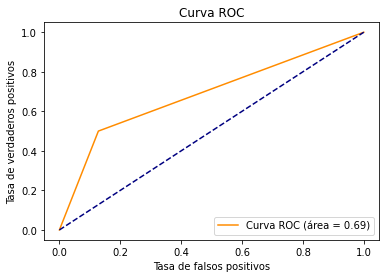

{'AUC': 0.686, 'Confusion Matrix': array([[109,  16],
       [ 45,  45]], dtype=int64), 'Accuracy Score': 0.7162790697674418, 'ECM': 0.2837209302325581}


In [36]:
# Definir el modelo
modelo = LogisticRegression(max_iter=10000)
# Usar la función evalua_metodo
resultados = evalua_metodo(modelo, X_train, y_train, X_test, y_test)
print(resultados)

AUC: 0.5978
Confusion Matrix:
[[105  20]
 [ 58  32]]
Accuracy Score: 0.6372093023255814


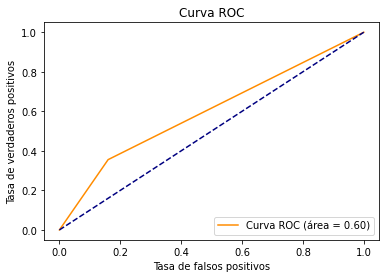

{'AUC': 0.5977777777777779, 'Confusion Matrix': array([[105,  20],
       [ 58,  32]], dtype=int64), 'Accuracy Score': 0.6372093023255814, 'ECM': 0.3627906976744186}


In [37]:
# Definir el modelo
knn = KNeighborsClassifier(n_neighbors=5)
#Usar la función evalua_metodo
resultados = evalua_metodo(knn, X_train, y_train, X_test, y_test)
print(resultados)

AUC: 0.6860
Confusion Matrix:
[[109  16]
 [ 45  45]]
Accuracy Score: 0.7162790697674418


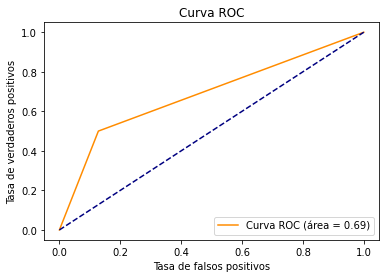

{'AUC': 0.686, 'Confusion Matrix': array([[109,  16],
       [ 45,  45]], dtype=int64), 'Accuracy Score': 0.7162790697674418, 'ECM': 0.2837209302325581}


In [38]:
# Definir el modelo
modelo3= LinearDiscriminantAnalysis(n_components=1)
#Usar la función evalua_metodo
resultados = evalua_metodo(modelo3, X_train, y_train, X_test, y_test)
print(resultados)

## Inciso 2

#### Escriban una función, llamada cross validation, que realice validación cruzada con k iteraciones (k-fold CV), llamando a la función del  inciso anterior en cada una, pero para las k distintas particiones. 
#### La función debe recibir como argumentos el modelo, el valor de k y un dataset (es decir, s´olo X e y).
#### Pueden ayudarse con la función KFold para generar las particiones necesarias

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [42]:
def cross_validation(modelo, k, x, y, std=True, coef=False):
    if isinstance(x, np.ndarray):
        x = pd.DataFrame(x)
    if isinstance(y, np.ndarray):
        y = pd.DataFrame(y)

    sc = StandardScaler()
    kf = KFold(n_splits=k, shuffle=True, random_state = 2023)
    output = []

    for i, (train_index, test_index) in enumerate(kf.split(x)):
        x_train, x_test = x.iloc[list(train_index)], x.iloc[list(test_index)]
        y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]

        if std:
            x_train = pd.DataFrame(sc.fit_transform(x_train), index=x_train.index, columns=x_train.columns)
            x_test = pd.DataFrame(sc.transform(x_test), index=x_test.index, columns=x_test.columns)

        # Llamar a evalua_metodo para calcular las métricas
        metrics = evalua_metodo(modelo, x_train, y_train, x_test, y_test, plot=False, coef=coef)

        # Extraer las métricas calculadas en evalua_metodo
        matriz_confusion = metrics['Confusion Matrix']
        valor_auc = metrics['AUC']
        accuracy = metrics['Accuracy Score']
        ecm = metrics['ECM']

        proporcion_variables_cero = None

        if coef:
            proporcion_variables_cero = metrics['Proporción de Variables con Coeficiente Cero']

        output.append((i+1, ecm, valor_auc, accuracy, matriz_confusion, proporcion_variables_cero))

    output_df = pd.DataFrame(output, columns=["Particion", "MSE", "valor_auc", "accuracy", "matriz_confusion", "proporcion_variables_cero"])
    return output_df

In [ ]:
# Ejemplo de la función con 5 particiones,sin estandarización y sin reporte de la proporción de variables con coeficientes estimados iguales a cero.. 
cross_validation(modelo,5,X,y,std=False,coef=False)

## Inciso 3

#### Escriban una función, llamada evalua config que reciba una lista de configuraciones de hiperparámetros (los distintos valores a probar como hiper-parámetros podrian codificarse en diccionarios de Python)y utilizando la función cross validation obtenga el error cuadrado promedio para cada configuración.

In [44]:
def evalua_config(model_types, lambdas, X, y):
    """
    Encuentra el valor óptimo de lambda (α) para Ridge, Lasso o ambos modelos en un modelo de clasificación.

    Args:
    - model_types: Lista de tipos de modelo ('ridge', 'lasso', o ambos).
    - lambdas: Lista de valores de lambda (α) para evaluar.
    - X: Variables explicativas.
    - y: Variable objetivo (etiquetas binarias 0 y 1).

    Returns:
    - DataFrame que contiene los valores de lambda y los errores cuadráticos medios asociados para los modelos seleccionados.
    """

    if not all(model_type in ['ridge', 'lasso'] for model_type in model_types):
        raise ValueError("Los elementos en 'model_types' deben ser 'ridge', 'lasso', o ambos.")

    resultados_lambda = []

    for model_type in model_types:
        if model_type == 'ridge':
            modelo = LogisticRegression(penalty='l2', solver='liblinear')
        else:
            modelo = LogisticRegression(penalty='l1', solver='liblinear')

        for alpha in lambdas:
            modelo.set_params(C=1/alpha)

            # Realizar validación cruzada utilizando cross_validation
            resultados = cross_validation(modelo, k=5, x=X, y=y, std=True)

            # Calcular el Error Cuadrático Medio (ECM) promedio
            ecm_promedio = np.mean(resultados['MSE'])

            resultados_lambda.append((model_type, alpha, ecm_promedio))
    # Crear un DataFrame a partir de la lista de tuplas
    resultados_df = pd.DataFrame(resultados_lambda, columns=["Model Type", "Lambda", "ECM"])
    
    return resultados_df

In [48]:
# Ejemplo de uso para ambos métodos de regularización:
lambdas_ambos = [0.001, 0.01, 0.1, 1, 10, 50, 100, 1000, 10000]
resultados_ambos = evalua_config(['ridge','lasso'], lambdas_ambos, X, y)

AUC: 0.6675
Confusion Matrix:
[[76 14]
 [27 26]]
Accuracy Score: 0.7132867132867133
AUC: 0.6763
Confusion Matrix:
[[71 14]
 [28 30]]
Accuracy Score: 0.7062937062937062
AUC: 0.6811
Confusion Matrix:
[[73 19]
 [22 29]]
Accuracy Score: 0.7132867132867133
AUC: 0.6988
Confusion Matrix:
[[69 15]
 [25 34]]
Accuracy Score: 0.7202797202797203
AUC: 0.6143
Confusion Matrix:
[[59 14]
 [40 29]]
Accuracy Score: 0.6197183098591549
AUC: 0.6675
Confusion Matrix:
[[76 14]
 [27 26]]
Accuracy Score: 0.7132867132867133
AUC: 0.6763
Confusion Matrix:
[[71 14]
 [28 30]]
Accuracy Score: 0.7062937062937062
AUC: 0.6811
Confusion Matrix:
[[73 19]
 [22 29]]
Accuracy Score: 0.7132867132867133
AUC: 0.6988
Confusion Matrix:
[[69 15]
 [25 34]]
Accuracy Score: 0.7202797202797203
AUC: 0.6143
Confusion Matrix:
[[59 14]
 [40 29]]
Accuracy Score: 0.6197183098591549
AUC: 0.6675
Confusion Matrix:
[[76 14]
 [27 26]]
Accuracy Score: 0.7132867132867133
AUC: 0.6763
Confusion Matrix:
[[71 14]
 [28 30]]
Accuracy Score: 0.706293706

In [ ]:
print("\nResultados para ambos:")
print(resultados_ambos)

mejor_lambda = resultados_ambos.loc[resultados_ambos['ECM'].idxmin()]['Lambda']
mejor_metodo = resultados_ambos.loc[resultados_ambos['ECM'].idxmin()]['Model Type']
print("Valor óptimo de lambda (ambos):", mejor_lambda_ambos)


In [50]:
# Mostrar el DataFrame asociado a Ridge
print("Resultados para Ridge:")
print(resultados_ridge)

# Lambda con menor ECM para Ridge
mejor_lambda_ridge = resultados_ridge.loc[resultados_ridge['ECM'].idxmin()]['Lambda']
print("Valor óptimo de lambda (Ridge):", mejor_lambda_ridge)

# Mostrar el DataFrame asociado a Lasso
print("\nResultados para Lasso:")
print(resultados_lasso)

# Lambda con menor ECM para Lasso
mejor_lambda_lasso = resultados_lasso.loc[resultados_lasso['ECM'].idxmin()]['Lambda']
print("Valor óptimo de lambda (Lasso):", mejor_lambda_lasso)

Resultados para Ridge:
  Model Type     Lambda       ECM
0      ridge      0.001  0.305427
1      ridge      0.010  0.305427
2      ridge      0.100  0.305427
3      ridge      1.000  0.305427
4      ridge     10.000  0.304028
5      ridge     50.000  0.302610
6      ridge    100.000  0.294199
7      ridge   1000.000  0.303969
8      ridge  10000.000  0.306796
Valor óptimo de lambda (Ridge): 100.0

Resultados para Lasso:
  Model Type     Lambda       ECM
0      lasso      0.001  0.305427
1      lasso      0.010  0.305427
2      lasso      0.100  0.305427
3      lasso      1.000  0.304028
4      lasso     10.000  0.308185
5      lasso     50.000  0.348793
6      lasso    100.000  0.361282
7      lasso   1000.000  0.406274
8      lasso  10000.000  0.406274
Valor óptimo de lambda (Lasso): 1.0


## Ejercicio 4

## Inciso 4

#### Escriban una función llamada "evalua multiples metodos" que les permita implementar los siguiente métodos con los hiperparámetros que ustedes elijan. 
#### Para la regresión logística, aseg´urense de que esta función utilice su función.
#### evalua config para optimizar el λ de la regularizaci´on. Finalmente, el output de la función debe ser una tabla donde las columnas sean las métricas que hayan evaluado (las que hayan incluido en la función evalua metodo) y las filas sean los modelos (con su configuraci´on de hiperpar´ametros asociada) que hayan corrido.
#### Asegúrense de que la tabla incluya una columna con nombre del modelo y el valor de los hiperparámetros/configuración:

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

def evalua_multiples_metodos(X, y, metodos):
    """
    Evalúa varios métodos de clasificación con hiperparámetros personalizados y regresión logística con optimización de lambda.

    Args:
    - X: Variables explicativas.
    - y: Variable objetivo (etiquetas binarias 0 y 1).
    - metodos: Lista de diccionarios que especifican los métodos y sus hiperparámetros.

    Returns:
    - Lista de diccionarios que contienen las métricas evaluadas para cada modelo.
    """
    resultados = []  # Resultados como una lista de diccionarios

    for metodo in metodos:
        nombre_modelo = metodo['nombre']
        hiperparametros = metodo['hiperparametros']
        resultados_modelo = {}  # Inicializar resultados_modelo

        if nombre_modelo == 'Regresión Logística':
            # Optimizar lambda (α) para la regularización de la Regresión Logística
            lambdas = hiperparametros.get('lambdas', [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]) ## Su default de lambdas es este.
            resultados_log = evalua_config(['ridge','lasso'], lambdas, X, y)
            mejor_lambda = resultados_log.loc[resultados_log['ECM'].idxmin()]['Lambda']
            mejor_metodo = resultados_log.loc[resultados_log['ECM'].idxmin()]['Model Type']
            if mejor_metodo == "ridge":
                modelo = LogisticRegression(penalty='l2', C=1/mejor_lambda, solver='liblinear')
            else:
                modelo = LogisticRegression(penalty='l1', C=1/mejor_lambda, solver='saga')
            resultados_modelo = evalua_metodo(modelo, X_train, y_train, X_test, y_test)
        elif nombre_modelo == 'Análisis de Discriminante Lineal':
            # Crear el modelo de Análisis de Discriminante Lineal con los hiperparámetros personalizados
            modelo = LinearDiscriminantAnalysis(**hiperparametros)
            # Evaluar el modelo
            resultados_modelo = evalua_metodo(modelo, X_train, y_train, X_test, y_test)
        elif nombre_modelo == 'KNN':
            # Crear el modelo K-Nearest Neighbors (KNN) con los hiperparámetros personalizados
            modelo = KNeighborsClassifier(**hiperparametros)
            
            # Evaluar el modelo
            resultados_modelo = evalua_metodo(modelo, X_train, y_train, X_test, y_test)

        # Agregar el nombre del modelo y los hiperparámetros/configuración
        resultados_modelo['Modelo'] = nombre_modelo
        resultados_modelo['Hiperparámetros'] = str(hiperparametros)
        resultados.append(resultados_modelo)
    resultados_df = pd.DataFrame(resultados)
    return resultados_df, mejor_metodo, mejor_lambda  # Resultados es un diccionario que contiene los resultados de cada modelo

AUC: 0.7485
Confusion Matrix:
[[264  70]
 [ 86 207]]
Accuracy Score: 0.7511961722488039
AUC: 0.7827
Confusion Matrix:
[[286  58]
 [ 75 207]]
Accuracy Score: 0.7875399361022364
AUC: 0.8144
Confusion Matrix:
[[266  57]
 [ 59 244]]
Accuracy Score: 0.8146964856230032
AUC: 0.8037
Confusion Matrix:
[[274  49]
 [ 73 230]]
Accuracy Score: 0.805111821086262
AUC: 0.7475
Confusion Matrix:
[[261  60]
 [ 97 208]]
Accuracy Score: 0.7492012779552716
AUC: 0.7517
Confusion Matrix:
[[265  69]
 [ 85 208]]
Accuracy Score: 0.7543859649122807
AUC: 0.7895
Confusion Matrix:
[[287  57]
 [ 72 210]]
Accuracy Score: 0.7939297124600639
AUC: 0.8162
Confusion Matrix:
[[265  58]
 [ 57 246]]
Accuracy Score: 0.8162939297124601
AUC: 0.8053
Confusion Matrix:
[[274  49]
 [ 72 231]]
Accuracy Score: 0.8067092651757188
AUC: 0.7475
Confusion Matrix:
[[261  60]
 [ 97 208]]
Accuracy Score: 0.7492012779552716
AUC: 0.7583
Confusion Matrix:
[[266  68]
 [ 82 211]]
Accuracy Score: 0.7607655502392344
AUC: 0.7859
Confusion Matrix:
[[2

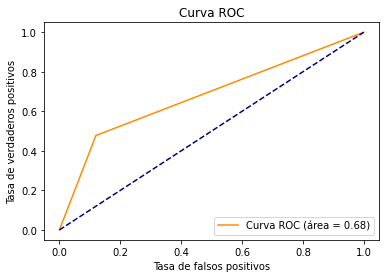

AUC: 0.6860
Confusion Matrix:
[[109  16]
 [ 45  45]]
Accuracy Score: 0.7162790697674418


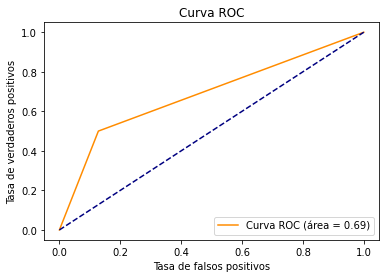

AUC: 0.6071
Confusion Matrix:
[[99 26]
 [52 38]]
Accuracy Score: 0.6372093023255814


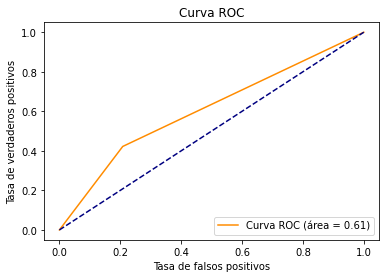

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

# Definir los hiperparámetros para cada método
hiperparametros_rl = {
    'lambdas': [0.1, 1, 10, 50],
}

hiperparametros_lda = {
    'solver': 'lsqr',
}

hiperparametros_knn = {
    'n_neighbors': 3,
}

# Lista de métodos y sus hiperparámetros
metodos = [
    {
        'nombre': 'Regresión Logística',
        'hiperparametros': hiperparametros_rl,
    },
    {
        'nombre': 'Análisis de Discriminante Lineal',
        'hiperparametros': hiperparametros_lda,
    },
    {
        'nombre': 'KNN',
        'hiperparametros': hiperparametros_knn,
    },
]

# Utilizar la función evalua_multiples_metodos con datos de ejemplo
resultados = evalua_multiples_metodos(X, y, metodos)

In [84]:
# Obtener el DataFrame del primer lugar de la tupla
data_frame_resultados = resultados[0]

# Obtener el valor que se encuentra en el segundo lugar de la tupla
valor_hiperparametro_optimo = resultados[2]

# Obtener el valor que se encuentra en el segundo lugar de la tupla
mejor_metodo_res = resultados[1]

if 'Regresión Logística' in data_frame_resultados['Modelo'].values:
    # Encontrar la fila correspondiente al modelo 'Regresión Logística' y agregar el valor
    fila_regresion_logistica = data_frame_resultados[data_frame_resultados['Modelo'] == 'Regresión Logística']
    data_frame_resultados.loc[fila_regresion_logistica.index, 'Metodo'] = mejor_metodo_res
else:
    # Si no se encuentra el modelo 'Regresión Logística, configurar NaN en toda la columna
    data_frame_resultados['Metodo'] = None

# Verificar si el DataFrame contiene el modelo 'Regresión Logística' y agregar el valor al modelo adecuado
if 'Regresión Logística' in data_frame_resultados['Modelo'].values:
    # Encontrar la fila correspondiente al modelo 'Regresión Logística' y agregar el valor
    fila_regresion_logistica = data_frame_resultados[data_frame_resultados['Modelo'] == 'Regresión Logística']
    data_frame_resultados.loc[fila_regresion_logistica.index, 'Hiperparámetro Óptimo'] = valor_hiperparametro_optimo
else:
    # Si no se encuentra el modelo 'Regresión Logística, configurar NaN en toda la columna
    data_frame_resultados['Hiperparámetro Óptimo'] = None

    

# Imprimir el DataFrame modificado
print(data_frame_resultados)

        AUC       Confusion Matrix  Accuracy Score       ECM  \
0  0.678889  [[110, 15], [47, 43]]        0.711628  0.288372   
1  0.686000  [[109, 16], [45, 45]]        0.716279  0.283721   
2  0.607111   [[99, 26], [52, 38]]        0.637209  0.362791   

                             Modelo                Hiperparámetros Metodo  \
0               Regresión Logística  {'lambdas': [0.1, 1, 10, 50]}  ridge   
1  Análisis de Discriminante Lineal             {'solver': 'lsqr'}    NaN   
2                               KNN             {'n_neighbors': 3}    NaN   

   Hiperparámetro Óptimo  
0                    1.0  
1                    NaN  
2                    NaN  


# Parte 3: Análisis de la base de hogares y cálculo de pobreza

In [60]:
import pandas as pd
import numpy as np
#from ISLP import load_data

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [61]:
variables = respondieron.columns
for variable in variables:
   print(variable)

CODUSU
ANO4_indv
TRIMESTRE_indv
NRO_HOGAR
COMPONENTE
H15
REGION_indv
MAS_500_indv
AGLOMERADO_indv
PONDERA_indv
CH03
CH04
CH05
CH06
CH07
CH08
CH09
CH10
CH11
CH12
CH13
CH14
CH15
CH16
NIVEL_ED
ESTADO
CAT_OCUP
CAT_INAC
PP02C1
PP02C2
PP02C3
PP02C4
PP02C5
PP02C6
PP02C7
PP02C8
PP02E
PP02H
PP02I
PP03C
PP03D
PP3E_TOT
PP3F_TOT
PP03G
PP03H
PP03I
PP03J
INTENSI
PP04A
PP04B_COD
PP04B1
PP04B2
PP04B3_MES
PP04B3_ANO
PP04B3_DIA
PP04C
PP04C99
PP04D_COD
PP04G
PP05B2_MES
PP05B2_ANO
PP05B2_DIA
PP05C_1
PP05C_2
PP05C_3
PP05E
PP05F
PP05H
PP06A
PP06C
PP06D
PP06E
PP06H
PP07A
PP07C
PP07D
PP07E
PP07F1
PP07F2
PP07F3
PP07F4
PP07F5
PP07G1
PP07G2
PP07G3
PP07G4
PP07G_59
PP07H
PP07I
PP07J
PP07K
PP08D1
PP08D4
PP08F1
PP08F2
PP08J1
PP08J2
PP08J3
PP09A
PP09B
PP09C
P21
DECOCUR
RDECOCUR
GDECOCUR
ADECOCUR
PONDIIO
TOT_P12
P47T
DECINDR
RDECINDR
GDECINDR
ADECINDR
PONDII
V2_M
V3_M
V4_M
V5_M
V8_M
V9_M
V10_M
V11_M
V12_M
V18_M
V19_AM
V21_M
T_VI
ITF_indv
DECIFR_indv
RDECIFR_indv
GDECIFR_indv
ADECIFR_indv
IPCF_indv
DECCFR_indv
RDECCFR_

In [62]:
# Eliminar columnas específicas
respondieron = respondieron.drop(columns=['CODUSU','ANO4_indv','TRIMESTRE_indv','REGION_indv', 'MAS_500_indv','ANO4_hogar','TRIMESTRE_hogar','REGION_hogar', 'MAS_500_hogar', 'CH05','CH14'])

# Eliminar un rango de columnas: ingresos de la ocupación principal de los asalariados
respondieron = respondieron.drop(columns=[col for col in respondieron.columns if col.startswith('PP08')])

# Eliminar un rango de columnas: Ingresos de la ocupación principal de los trabajadores independientes
respondieron = respondieron.drop(columns=[col for col in respondieron.columns if col.startswith('PP06')])

# Ingresos de la ocupación principal
start = respondieron.columns.get_loc('PP03C')
end = respondieron.columns.get_loc('PONDIH_indv')

columns_to_drop = respondieron.columns[start:end+1]
respondieron = respondieron.drop(columns=columns_to_drop)

# Ingresos de la ocupación principal
start = respondieron.columns.get_loc('ITF_hogar')
end = respondieron.columns.get_loc('PONDIH_hogar')

columns_to_drop = respondieron.columns[start:end+1]
respondieron = respondieron.drop(columns=columns_to_drop)

# Ingresos de la ocupación principal
start = respondieron.columns.get_loc('adulto_equiv')
end = respondieron.columns.get_loc('ingreso_necesario')

columns_to_drop = respondieron.columns[start:end+1]
respondieron = respondieron.drop(columns=columns_to_drop)

In [63]:
# Eliminar columnas específicas
norespondieron = norespondieron.drop(columns=['CODUSU','ANO4_indv','TRIMESTRE_indv','REGION_indv', 'MAS_500_indv','ANO4_hogar','TRIMESTRE_hogar','REGION_hogar', 'MAS_500_hogar', 'CH05','CH14'])

# Eliminar un rango de columnas: ingresos de la ocupación principal de los asalariados
norespondieron = norespondieron.drop(columns=[col for col in norespondieron.columns if col.startswith('PP08')])

# Eliminar un rango de columnas: Ingresos de la ocupación principal de los trabajadores independientes
norespondieron = norespondieron.drop(columns=[col for col in norespondieron.columns if col.startswith('PP06')])

# Ingresos de la ocupación principal
start = norespondieron.columns.get_loc('P21')
end = norespondieron.columns.get_loc('PONDIH_indv')

columns_to_drop = norespondieron.columns[start:end+1]
norespondieron = norespondieron.drop(columns=columns_to_drop)

# Ingresos de la ocupación principal
start = norespondieron.columns.get_loc('ITF_hogar')
end = norespondieron.columns.get_loc('PONDIH_hogar')

columns_to_drop = norespondieron.columns[start:end+1]
norespondieron = norespondieron.drop(columns=columns_to_drop)

# Ingresos de la ocupación principal
start = norespondieron.columns.get_loc('adulto_equiv')
end = norespondieron.columns.get_loc('ad_equiv_hogar')

columns_to_drop = norespondieron.columns[start:end+1]
norespondieron = norespondieron.drop(columns=columns_to_drop)

In [ ]:
variables = respondieron.columns
for variable in variables:
   print(variable)

In [64]:
# To check before running the models
# Obtener el nombre de las columnas que tienen al menos un NaN
columnas_con_nas = respondieron.columns[respondieron.isna().any()].tolist()

# Imprimir las columnas
print(columnas_con_nas)


['CH08']


In [65]:
# Eliminar las observaciones con NaN en 'column_name' directamente en el DataFrame original
respondieron.dropna(subset=['CH08'], inplace=True)


In [66]:
# Definimos la matriz de Xs 
X = respondieron.drop(['pobre'], axis=1)
y = respondieron.pobre

## Ejercicio 2

AUC: 0.7517
Confusion Matrix:
[[265  69]
 [ 85 208]]
Accuracy Score: 0.7543859649122807
AUC: 0.7895
Confusion Matrix:
[[287  57]
 [ 72 210]]
Accuracy Score: 0.7939297124600639
AUC: 0.8162
Confusion Matrix:
[[265  58]
 [ 57 246]]
Accuracy Score: 0.8162939297124601
AUC: 0.8053
Confusion Matrix:
[[274  49]
 [ 72 231]]
Accuracy Score: 0.8067092651757188
AUC: 0.7475
Confusion Matrix:
[[261  60]
 [ 97 208]]
Accuracy Score: 0.7492012779552716
AUC: 0.7583
Confusion Matrix:
[[266  68]
 [ 82 211]]
Accuracy Score: 0.7607655502392344
AUC: 0.7859
Confusion Matrix:
[[287  57]
 [ 74 208]]
Accuracy Score: 0.7907348242811502
AUC: 0.8146
Confusion Matrix:
[[264  59]
 [ 57 246]]
Accuracy Score: 0.8146964856230032
AUC: 0.8021
Confusion Matrix:
[[273  50]
 [ 73 230]]
Accuracy Score: 0.8035143769968051
AUC: 0.7492
Confusion Matrix:
[[261  60]
 [ 96 209]]
Accuracy Score: 0.7507987220447284
AUC: 0.7645
Confusion Matrix:
[[269  65]
 [ 81 212]]
Accuracy Score: 0.7671451355661882
AUC: 0.7816
Confusion Matrix:
[[

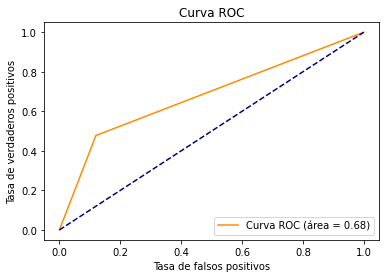

AUC: 0.6860
Confusion Matrix:
[[109  16]
 [ 45  45]]
Accuracy Score: 0.7162790697674418


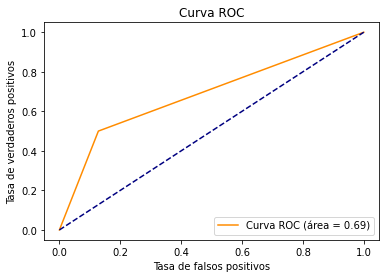

AUC: 0.5978
Confusion Matrix:
[[105  20]
 [ 58  32]]
Accuracy Score: 0.6372093023255814


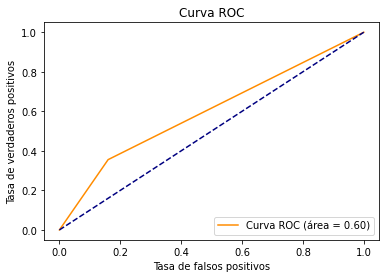

In [67]:
#Corran la funcion evalua multiples metodos (de la Parte 2) con la base respondieron, con 
# al menos un hiperparámetro para regularizar y al menos un valor de \lambda. 


from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

# Definir los hiperparámetros para cada método
hiperparametros_rl = {
    'lambdas': [ 1, 10, 50],
}

hiperparametros_lda = {
    'solver': 'lsqr',
}

hiperparametros_knn = {
    'n_neighbors': 5,
}

# Lista de métodos y sus hiperparámetros
metodos = [
    {
        'nombre': 'Regresión Logística',
        'hiperparametros': hiperparametros_rl,
    },
    {
        'nombre': 'Análisis de Discriminante Lineal',
        'hiperparametros': hiperparametros_lda,
    },
    {
        'nombre': 'KNN',
        'hiperparametros': hiperparametros_knn,
    },
]

# Ahora llamamos a la función
resultados_df=evalua_multiples_metodos(X, y, metodos)
# Ver los resultados



In [68]:
# Obtener el DataFrame del primer lugar de la tupla
data_frame_resultados = resultados[0]

# Obtener el valor que se encuentra en el segundo lugar de la tupla
valor_hiperparametro_optimo = resultados[2]

# Obtener el valor que se encuentra en el segundo lugar de la tupla
mejor_metodo_res = resultados[1]

if 'Regresión Logística' in data_frame_resultados['Modelo'].values:
    # Encontrar la fila correspondiente al modelo 'Regresión Logística' y agregar el valor
    fila_regresion_logistica = data_frame_resultados[data_frame_resultados['Modelo'] == 'Regresión Logística']
    data_frame_resultados.loc[fila_regresion_logistica.index, 'Metodo'] = mejor_metodo_res
else:
    # Si no se encuentra el modelo 'Regresión Logística, configurar NaN en toda la columna
    data_frame_resultados['Metodo'] = None

# Verificar si el DataFrame contiene el modelo 'Regresión Logística' y agregar el valor al modelo adecuado
if 'Regresión Logística' in data_frame_resultados['Modelo'].values:
    # Encontrar la fila correspondiente al modelo 'Regresión Logística' y agregar el valor
    fila_regresion_logistica = data_frame_resultados[data_frame_resultados['Modelo'] == 'Regresión Logística']
    data_frame_resultados.loc[fila_regresion_logistica.index, 'Hiperparámetro Óptimo'] = valor_hiperparametro_optimo
else:
    # Si no se encuentra el modelo 'Regresión Logística, configurar NaN en toda la columna
    data_frame_resultados['Hiperparámetro Óptimo'] = None

    

# Imprimir el DataFrame modificado
print(data_frame_resultados)


        AUC       Confusion Matrix  Accuracy Score       ECM  \
0  0.620444   [[119, 6], [64, 26]]        0.674419  0.325581   
1  0.686000  [[109, 16], [45, 45]]        0.716279  0.283721   
2  0.607111   [[99, 26], [52, 38]]        0.637209  0.362791   

                             Modelo  \
0               Regresión Logística   
1  Análisis de Discriminante Lineal   
2                               KNN   

                                     Hiperparámetros Metodo  \
0  {'lambdas': [0.001, 0.01, 0.1, 1, 10, 50, 100,...  ridge   
1                                 {'solver': 'lsqr'}    NaN   
2                                 {'n_neighbors': 3}    NaN   

   Hiperparámetro Óptimo  
0                  100.0  
1                    NaN  
2                    NaN  


## Ejercicio 3

#### En el ejercicio de regularización, lambda actúa de manera similar tanto en regresión lineal como en regresión logística y clasificación. Lo que hace lambda es penalizar la minimización de la función de costo. La idea detrás de esto es reducir el overfitting: se establece un trade-off entre sesgar ligeramente nuestra estimación original en el conjunto de entrenamiento y reducir la varianza una vez que se aplica el modelo en el conjunto de prueba.Ahora bien, considerando que un valor alto de lambda hace que el modelo sea menos sensible a las variaciones en las variables explicativas, mientras que un valor bajo de lambda se acerca más a un modelo sin regularización, surge la pregunta de cómo elegir el valor adecuado de lambda. La mejor manera de abordar esta elección es mediante la validación cruzada, que implica probar distintos valores de lambda en un conjunto de entrenamiento y validación, eligiendo aquel que minimice la varianza en este último conjunto antes de evaluar el rendimiento en el conjunto de prueba.Es importante destacar que no se debe utilizar el conjunto de prueba para seleccionar el valor de lambda, ya que esto introduciría sesgo en la evaluación del rendimiento del modelo. Ajustar hiperparámetros en el conjunto de prueba haría que el modelo parezca funcionar mejor en datos no vistos de lo que sería en la práctica. En cambio, la validación cruzada nos permite evaluar diferentes valores de lambda en el conjunto de entrenamiento y validación sin involucrar el conjunto de prueba. Esto garantiza una estimación más realista del rendimiento del modelo en datos no vistos, ya que el conjunto de prueba se mantiene aislado y no se utiliza en la selección de hiperparámetros.

## Ejercicio 4

##### El método de K-fold cross-validation se utiliza para evaluar el rendimiento de modelos en machine learning dividiendo el conjunto de datos en K partes y probando iterativamente con una de ellas como conjunto de test y las demás como conjunto de entrenamiento.

##### Problema de usar un K muy pequeño: La evaluación puede ser sensible a la partición específica de los datos, lo que podría llevar a sobreajustar el modelo a ciertas peculiaridades y no generalizar bien a otros datos no vistos. 

##### Problema de usar un K muy grande (p. ej., K=n, LOOCV): En el extremo, esto implica una validación cruzada "leave-one-out," donde se deja una sola muestra como conjunto de test en cada iteración. Aunque proporciona estimaciones de rendimiento más estables, puede ser costoso en términos computacionales, especialmente en conjuntos de datos grandes.

##### Cuando K=n (LOOCV), se estima el modelo n veces, una vez por cada muestra en el conjunto de datos, entrenando en todas las muestras excepto una en cada iteración, y dejando la observación individual como testeo. Esto proporciona una estimación precisa del rendimiento, pero puede ser computacionalmente costoso y propenso a alta varianza en los resultados de los modelos. La alta variabilidad en las estimaciones de rendimiento significa que los resultados de cada iteración de LOOCV pueden diferir considerablemente entre sí. Esto puede hacer que sea más difícil confiar en las estimaciones de rendimiento y comparar diferentes configuraciones de modelos o hiperparámetros.

## Ejercicio 5

#### Realicen un barrido en λ = 10^n con n ∈ {−5, −4, −3 . . . , +4, +5} y utilicen 10 fold CV para elegir el λ optimo en regresion logistica con Ridge y con LASSO.
#### ¿Qué λ seleccionó en cada caso? Generen box-plots mostrando la distribución del error de predicci´on para cada λ. Cada box debe corresponder a un valor de λ y contener como observaciones el error medio de validaci´on para cada partici´on.
#### Ademas, para la regularizacion LASSO, genere un box-plot similar, pero ahora graficando la proporci´on de variables ignoradas por el modelo en funci´on de λ, es decir la proporcion de variables para las cuales el coeficiente asociado es cero.


### Primero identificamos el Lambda óptimo. 

In [69]:
lambda_values = [10**i for i in range(-5, 6)]
configuraciones_lasso = []
configuraciones_ridge = []

for l in lambda_values:
    # Para Lasso
    config_l = {'penalty': 'l1', 'C': 1/l, 'solver': 'saga'}
    configuraciones_lasso.append(config_l)
    
    # Para Ridge
    config_r = {'penalty': 'l2', 'C': 1/l}
    configuraciones_ridge.append(config_r) 

In [70]:
config_opt_lasso = evalua_config(["lasso"],lambda_values, X, y)
config_opt_ridge = evalua_config(["ridge"],lambda_values, X, y)

AUC: 0.7467
Confusion Matrix:
[[264  70]
 [ 87 206]]
Accuracy Score: 0.7496012759170654
AUC: 0.7842
Confusion Matrix:
[[287  57]
 [ 75 207]]
Accuracy Score: 0.7891373801916933
AUC: 0.8161
Confusion Matrix:
[[266  57]
 [ 58 245]]
Accuracy Score: 0.8162939297124601
AUC: 0.8020
Confusion Matrix:
[[274  49]
 [ 74 229]]
Accuracy Score: 0.8035143769968051
AUC: 0.7475
Confusion Matrix:
[[261  60]
 [ 97 208]]
Accuracy Score: 0.7492012779552716
AUC: 0.7485
Confusion Matrix:
[[264  70]
 [ 86 207]]
Accuracy Score: 0.7511961722488039
AUC: 0.7842
Confusion Matrix:
[[287  57]
 [ 75 207]]
Accuracy Score: 0.7891373801916933
AUC: 0.8161
Confusion Matrix:
[[266  57]
 [ 58 245]]
Accuracy Score: 0.8162939297124601
AUC: 0.8020
Confusion Matrix:
[[274  49]
 [ 74 229]]
Accuracy Score: 0.8035143769968051
AUC: 0.7475
Confusion Matrix:
[[261  60]
 [ 97 208]]
Accuracy Score: 0.7492012779552716
AUC: 0.7485
Confusion Matrix:
[[264  70]
 [ 86 207]]
Accuracy Score: 0.7511961722488039
AUC: 0.7842
Confusion Matrix:
[[

AUC: 0.7510
Confusion Matrix:
[[268  66]
 [ 88 205]]
Accuracy Score: 0.7543859649122807
AUC: 0.7540
Confusion Matrix:
[[276  68]
 [ 83 199]]
Accuracy Score: 0.7587859424920128
AUC: 0.7794
Confusion Matrix:
[[253  70]
 [ 68 235]]
Accuracy Score: 0.7795527156549521
AUC: 0.7894
Confusion Matrix:
[[268  55]
 [ 76 227]]
Accuracy Score: 0.7907348242811502
AUC: 0.7056
Confusion Matrix:
[[253  68]
 [115 190]]
Accuracy Score: 0.707667731629393
AUC: 0.7256
Confusion Matrix:
[[259  75]
 [ 95 198]]
Accuracy Score: 0.7288676236044657
AUC: 0.7219
Confusion Matrix:
[[260  84]
 [ 88 194]]
Accuracy Score: 0.7252396166134185
AUC: 0.7498
Confusion Matrix:
[[236  87]
 [ 70 233]]
Accuracy Score: 0.7492012779552716
AUC: 0.7566
Confusion Matrix:
[[250  73]
 [ 79 224]]
Accuracy Score: 0.7571884984025559
AUC: 0.6776
Confusion Matrix:
[[234  87]
 [114 191]]
Accuracy Score: 0.6789137380191693
AUC: 0.7126
Confusion Matrix:
[[256  78]
 [100 193]]
Accuracy Score: 0.7161084529505582
AUC: 0.7085
Confusion Matrix:
[[2

In [71]:
print(config_opt_lasso)

   Model Type        Lambda       ECM
0       lasso       0.00001  0.218450
1       lasso       0.00010  0.218131
2       lasso       0.00100  0.218451
3       lasso       0.01000  0.218770
4       lasso       0.10000  0.218451
5       lasso       1.00000  0.216535
6       lasso      10.00000  0.224204
7       lasso     100.00000  0.249761
8       lasso    1000.00000  0.474611
9       lasso   10000.00000  0.474611
10      lasso  100000.00000  0.474611


In [105]:
# Lambda con menor ECM para Lasso
mejor_lambda_lasso = config_opt_lasso.loc[config_opt_lasso['ECM'].idxmin()]['Lambda']
print("Valor óptimo de lambda (Lasso):", mejor_lambda_lasso)
# Lambda con menor ECM para Ridge
mejor_lambda_lasso = config_opt_ridge.loc[config_opt_ridge['ECM'].idxmin()]['Lambda']
print("Valor óptimo de lambda (Ridge):", mejor_lambda_ridge)

Valor óptimo de lambda (Lasso): 1.0
Valor óptimo de lambda (Ridge): 100.0


#### Ahora armaremos tres gráficos. 

## Gráfico 1: Distribución de ECM según el hiperparámetro Lambda, bajo el método Ridge

In [ ]:
k = 10
dist_ridge = []

# Generaremos dos gráficos, uno por método. En cada gráfico, se muestra la distribución del error de predicción (definido como MSE) según el hiperparámetro lambda.
for config in configuraciones_ridge:
    modelo = LogisticRegression(max_iter=1000, **config)
    resultados = cross_validation(modelo, k, X, y)
    ecm_part = resultados[['Particion', 'MSE']]
    dist_ridge.append(ecm_part)


AUC: 0.7432
Confusion Matrix:
[[138  37]
 [ 42  97]]
Accuracy Score: 0.7484076433121019
AUC: 0.7532
Confusion Matrix:
[[128  31]
 [ 46 108]]
Accuracy Score: 0.7539936102236422
AUC: 0.7895
Confusion Matrix:
[[139  26]
 [ 39 109]]
Accuracy Score: 0.792332268370607
AUC: 0.7856
Confusion Matrix:
[[149  30]
 [ 35  99]]
Accuracy Score: 0.792332268370607
AUC: 0.8217
Confusion Matrix:
[[130  23]
 [ 33 127]]
Accuracy Score: 0.8210862619808307
AUC: 0.7817
Confusion Matrix:
[[135  35]
 [ 33 110]]
Accuracy Score: 0.7827476038338658
AUC: 0.7850
Confusion Matrix:
[[124  25]
 [ 43 121]]
Accuracy Score: 0.7827476038338658
AUC: 0.8059
Confusion Matrix:
[[144  30]
 [ 30 109]]
Accuracy Score: 0.8083067092651757
AUC: 0.7720
Confusion Matrix:
[[132  28]
 [ 43 110]]
Accuracy Score: 0.7731629392971247
AUC: 0.7232
Confusion Matrix:
[[128  33]
 [ 53  99]]
Accuracy Score: 0.7252396166134185
AUC: 0.7432
Confusion Matrix:
[[138  37]
 [ 42  97]]
Accuracy Score: 0.7484076433121019
AUC: 0.7532
Confusion Matrix:
[[12

Confusion Matrix:
[[138  15]
 [ 55 105]]
Accuracy Score: 0.7763578274760383
AUC: 0.7003
Confusion Matrix:
[[143  27]
 [ 63  80]]
Accuracy Score: 0.7124600638977636
AUC: 0.7326
Confusion Matrix:
[[132  17]
 [ 69  95]]
Accuracy Score: 0.7252396166134185
AUC: 0.7361
Confusion Matrix:
[[151  23]
 [ 55  84]]
Accuracy Score: 0.7507987220447284
AUC: 0.6769
Confusion Matrix:
[[134  26]
 [ 74  79]]
Accuracy Score: 0.6805111821086262
AUC: 0.6530
Confusion Matrix:
[[134  27]
 [ 80  72]]
Accuracy Score: 0.65814696485623
AUC: 0.5252
Confusion Matrix:
[[175   0]
 [132   7]]
Accuracy Score: 0.5796178343949044
AUC: 0.5130
Confusion Matrix:
[[159   0]
 [150   4]]
Accuracy Score: 0.5207667731629393
AUC: 0.5236
Confusion Matrix:
[[165   0]
 [141   7]]
Accuracy Score: 0.549520766773163
AUC: 0.5410
Confusion Matrix:
[[179   0]
 [123  11]]
Accuracy Score: 0.6070287539936102
AUC: 0.5219
Confusion Matrix:
[[153   0]
 [153   7]]
Accuracy Score: 0.5111821086261981
AUC: 0.5175
Confusion Matrix:
[[170   0]
 [138 

ValueError: Invalid RGBA argument: 'lightmagenta'

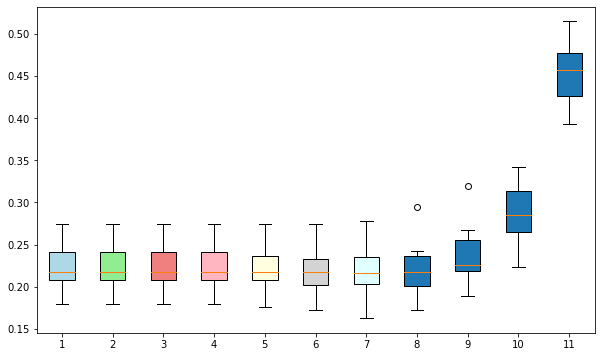

In [85]:
# Crear un gráfico con 10 boxplots
fig, ax = plt.subplots(figsize=(10, 6))

# Lista de etiquetas para los boxplots
#labels = [f'DataFrame {i + 1}' for i in range(10)]

# Recopilar todas las distribuciones de MSE
mse_data = [ecm_part['MSE'].values for ecm_part in dist_ridge]

# Crear los boxplots y agregarlos al gráfico
boxplots = ax.boxplot(mse_data, patch_artist=True)

# Personalizar los colores de los boxplots
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow', 'lightgray', 'lightcyan', 'lightmagenta', 'lightsalmon', 'lightseagreen']
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)

# Configurar el gráfico
ax.set(title='Distribuciones de MSE, según el parámetro lambda', xlabel='Lambdas', ylabel='MSE')

## Gráficos 2 y 3: Distribución de ECM y de proporción de variables con coeficiente igual a cero, según Lambda, bajo metodología LASSO

In [89]:
# Primero, obtenemos la distribución del MSE por partición. 
k = 10
dist_ecm_lasso = []
dist_prop_lasso=[]
for config in configuraciones_lasso:
    modelo = LogisticRegression(max_iter=1000, **config)
    resultados = cross_validation(modelo, k, X, y,coef=True)
    ecm_part = resultados[['Particion', 'MSE']]
    dist_ecm_lasso.append(ecm_part)
    prop_part = resultados[['Particion','proporcion_variables_cero']]
    dist_prop_lasso.append(prop_part) 

C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7468
Confusion Matrix:
[[138  37]
 [ 41  98]]
Accuracy Score: 0.7515923566878981


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7659
Confusion Matrix:
[[130  29]
 [ 44 110]]
Accuracy Score: 0.7667731629392971


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7992
Confusion Matrix:
[[140  25]
 [ 37 111]]
Accuracy Score: 0.8019169329073482


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7865
Confusion Matrix:
[[148  31]
 [ 34 100]]
Accuracy Score: 0.792332268370607


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8375
Confusion Matrix:
[[131  22]
 [ 29 131]]
Accuracy Score: 0.8370607028753994


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7887
Confusion Matrix:
[[135  35]
 [ 31 112]]
Accuracy Score: 0.7891373801916933


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7786
Confusion Matrix:
[[123  26]
 [ 44 120]]
Accuracy Score: 0.7763578274760383


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8152
Confusion Matrix:
[[146  28]
 [ 29 110]]
Accuracy Score: 0.8178913738019169


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7718
Confusion Matrix:
[[133  27]
 [ 44 109]]
Accuracy Score: 0.7731629392971247


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7265
Confusion Matrix:
[[128  33]
 [ 52 100]]
Accuracy Score: 0.7284345047923323


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7468
Confusion Matrix:
[[138  37]
 [ 41  98]]
Accuracy Score: 0.7515923566878981


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7659
Confusion Matrix:
[[130  29]
 [ 44 110]]
Accuracy Score: 0.7667731629392971


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7992
Confusion Matrix:
[[140  25]
 [ 37 111]]
Accuracy Score: 0.8019169329073482


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7865
Confusion Matrix:
[[148  31]
 [ 34 100]]
Accuracy Score: 0.792332268370607


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8375
Confusion Matrix:
[[131  22]
 [ 29 131]]
Accuracy Score: 0.8370607028753994


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7887
Confusion Matrix:
[[135  35]
 [ 31 112]]
Accuracy Score: 0.7891373801916933


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7786
Confusion Matrix:
[[123  26]
 [ 44 120]]
Accuracy Score: 0.7763578274760383


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8152
Confusion Matrix:
[[146  28]
 [ 29 110]]
Accuracy Score: 0.8178913738019169


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7718
Confusion Matrix:
[[133  27]
 [ 44 109]]
Accuracy Score: 0.7731629392971247


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7265
Confusion Matrix:
[[128  33]
 [ 52 100]]
Accuracy Score: 0.7284345047923323


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7468
Confusion Matrix:
[[138  37]
 [ 41  98]]
Accuracy Score: 0.7515923566878981


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7659
Confusion Matrix:
[[130  29]
 [ 44 110]]
Accuracy Score: 0.7667731629392971


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7992
Confusion Matrix:
[[140  25]
 [ 37 111]]
Accuracy Score: 0.8019169329073482


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7865
Confusion Matrix:
[[148  31]
 [ 34 100]]
Accuracy Score: 0.792332268370607


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8375
Confusion Matrix:
[[131  22]
 [ 29 131]]
Accuracy Score: 0.8370607028753994


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7887
Confusion Matrix:
[[135  35]
 [ 31 112]]
Accuracy Score: 0.7891373801916933


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7786
Confusion Matrix:
[[123  26]
 [ 44 120]]
Accuracy Score: 0.7763578274760383


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8152
Confusion Matrix:
[[146  28]
 [ 29 110]]
Accuracy Score: 0.8178913738019169


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7718
Confusion Matrix:
[[133  27]
 [ 44 109]]
Accuracy Score: 0.7731629392971247


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7265
Confusion Matrix:
[[128  33]
 [ 52 100]]
Accuracy Score: 0.7284345047923323


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7468
Confusion Matrix:
[[138  37]
 [ 41  98]]
Accuracy Score: 0.7515923566878981


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7659
Confusion Matrix:
[[130  29]
 [ 44 110]]
Accuracy Score: 0.7667731629392971


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7992
Confusion Matrix:
[[140  25]
 [ 37 111]]
Accuracy Score: 0.8019169329073482


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7865
Confusion Matrix:
[[148  31]
 [ 34 100]]
Accuracy Score: 0.792332268370607


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8375
Confusion Matrix:
[[131  22]
 [ 29 131]]
Accuracy Score: 0.8370607028753994


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7887
Confusion Matrix:
[[135  35]
 [ 31 112]]
Accuracy Score: 0.7891373801916933


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7786
Confusion Matrix:
[[123  26]
 [ 44 120]]
Accuracy Score: 0.7763578274760383


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8152
Confusion Matrix:
[[146  28]
 [ 29 110]]
Accuracy Score: 0.8178913738019169


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7718
Confusion Matrix:
[[133  27]
 [ 44 109]]
Accuracy Score: 0.7731629392971247


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7265
Confusion Matrix:
[[128  33]
 [ 52 100]]
Accuracy Score: 0.7284345047923323


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7468
Confusion Matrix:
[[138  37]
 [ 41  98]]
Accuracy Score: 0.7515923566878981


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7659
Confusion Matrix:
[[130  29]
 [ 44 110]]
Accuracy Score: 0.7667731629392971


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8023
Confusion Matrix:
[[141  24]
 [ 37 111]]
Accuracy Score: 0.805111821086262


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7865
Confusion Matrix:
[[148  31]
 [ 34 100]]
Accuracy Score: 0.792332268370607


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8375
Confusion Matrix:
[[131  22]
 [ 29 131]]
Accuracy Score: 0.8370607028753994


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7887
Confusion Matrix:
[[135  35]
 [ 31 112]]
Accuracy Score: 0.7891373801916933


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7786
Confusion Matrix:
[[123  26]
 [ 44 120]]
Accuracy Score: 0.7763578274760383


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8152
Confusion Matrix:
[[146  28]
 [ 29 110]]
Accuracy Score: 0.8178913738019169


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7718
Confusion Matrix:
[[133  27]
 [ 44 109]]
Accuracy Score: 0.7731629392971247


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7265
Confusion Matrix:
[[128  33]
 [ 52 100]]
Accuracy Score: 0.7284345047923323


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7504
Confusion Matrix:
[[138  37]
 [ 40  99]]
Accuracy Score: 0.7547770700636943


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7628
Confusion Matrix:
[[129  30]
 [ 44 110]]
Accuracy Score: 0.7635782747603834


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8023
Confusion Matrix:
[[141  24]
 [ 37 111]]
Accuracy Score: 0.805111821086262


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7903
Confusion Matrix:
[[148  31]
 [ 33 101]]
Accuracy Score: 0.7955271565495208


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8341
Confusion Matrix:
[[129  24]
 [ 28 132]]
Accuracy Score: 0.8338658146964856


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7951
Confusion Matrix:
[[136  34]
 [ 30 113]]
Accuracy Score: 0.7955271565495208


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7847
Confusion Matrix:
[[123  26]
 [ 42 122]]
Accuracy Score: 0.7827476038338658


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8188
Confusion Matrix:
[[146  28]
 [ 28 111]]
Accuracy Score: 0.8210862619808307


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7751
Confusion Matrix:
[[133  27]
 [ 43 110]]
Accuracy Score: 0.7763578274760383


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7168
Confusion Matrix:
[[127  34]
 [ 54  98]]
Accuracy Score: 0.7188498402555911


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7626
Confusion Matrix:
[[141  34]
 [ 39 100]]
Accuracy Score: 0.767515923566879


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7628
Confusion Matrix:
[[129  30]
 [ 44 110]]
Accuracy Score: 0.7635782747603834


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7793
Confusion Matrix:
[[139  26]
 [ 42 106]]
Accuracy Score: 0.7827476038338658


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7632
Confusion Matrix:
[[145  34]
 [ 38  96]]
Accuracy Score: 0.7699680511182109


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8244
Confusion Matrix:
[[127  26]
 [ 29 131]]
Accuracy Score: 0.8242811501597445


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7922
Confusion Matrix:
[[135  35]
 [ 30 113]]
Accuracy Score: 0.792332268370607


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7756
Confusion Matrix:
[[123  26]
 [ 45 119]]
Accuracy Score: 0.7731629392971247


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8088
Confusion Matrix:
[[145  29]
 [ 30 109]]
Accuracy Score: 0.8115015974440895


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7815
Confusion Matrix:
[[134  26]
 [ 42 111]]
Accuracy Score: 0.7827476038338658


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7104
Confusion Matrix:
[[126  35]
 [ 55  97]]
Accuracy Score: 0.7124600638977636
AUC: 0.7309
Confusion Matrix:
[[140  35]
 [ 47  92]]
Accuracy Score: 0.7388535031847133
AUC: 0.7394
Confusion Matrix:
[[136  23]
 [ 58  96]]
Accuracy Score: 0.7412140575079872
AUC: 0.7580
Confusion Matrix:
[[142  23]
 [ 51  97]]
Accuracy Score: 0.7635782747603834
AUC: 0.7352
Confusion Matrix:
[[147  32]
 [ 47  87]]
Accuracy Score: 0.7476038338658147
AUC: 0.7910
Confusion Matrix:
[[134  19]
 [ 47 113]]
Accuracy Score: 0.7891373801916933
AUC: 0.7467
Confusion Matrix:
[[135  35]
 [ 43 100]]
Accuracy Score: 0.7507987220447284
AUC: 0.7338
Confusion Matrix:
[[126  23]
 [ 62 102]]
Accuracy Score: 0.7284345047923323
AUC: 0.7814
Confusion Matrix:
[[148  26]
 [ 40  99]]
Accuracy Score: 0.7891373801916933
AUC: 0.7485
Confusion Matrix:
[[136  24]
 [ 54  99]]
Accuracy Score: 0.7507987220447284
AUC: 0.6641
Confusion Matrix:
[[127  34]
 [ 70  82]]
Accuracy Score: 0.6677316293929713
AUC: 0.5000
Confusion Matrix:
[[

### Gráfico 2

C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7468
Confusion Matrix:
[[138  37]
 [ 41  98]]
Accuracy Score: 0.7515923566878981


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7659
Confusion Matrix:
[[130  29]
 [ 44 110]]
Accuracy Score: 0.7667731629392971


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7992
Confusion Matrix:
[[140  25]
 [ 37 111]]
Accuracy Score: 0.8019169329073482


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7865
Confusion Matrix:
[[148  31]
 [ 34 100]]
Accuracy Score: 0.792332268370607


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8375
Confusion Matrix:
[[131  22]
 [ 29 131]]
Accuracy Score: 0.8370607028753994


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7887
Confusion Matrix:
[[135  35]
 [ 31 112]]
Accuracy Score: 0.7891373801916933


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7786
Confusion Matrix:
[[123  26]
 [ 44 120]]
Accuracy Score: 0.7763578274760383


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8152
Confusion Matrix:
[[146  28]
 [ 29 110]]
Accuracy Score: 0.8178913738019169


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7718
Confusion Matrix:
[[133  27]
 [ 44 109]]
Accuracy Score: 0.7731629392971247


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7265
Confusion Matrix:
[[128  33]
 [ 52 100]]
Accuracy Score: 0.7284345047923323


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7468
Confusion Matrix:
[[138  37]
 [ 41  98]]
Accuracy Score: 0.7515923566878981


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7659
Confusion Matrix:
[[130  29]
 [ 44 110]]
Accuracy Score: 0.7667731629392971


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7992
Confusion Matrix:
[[140  25]
 [ 37 111]]
Accuracy Score: 0.8019169329073482


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7865
Confusion Matrix:
[[148  31]
 [ 34 100]]
Accuracy Score: 0.792332268370607


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8375
Confusion Matrix:
[[131  22]
 [ 29 131]]
Accuracy Score: 0.8370607028753994


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7887
Confusion Matrix:
[[135  35]
 [ 31 112]]
Accuracy Score: 0.7891373801916933


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7786
Confusion Matrix:
[[123  26]
 [ 44 120]]
Accuracy Score: 0.7763578274760383


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8152
Confusion Matrix:
[[146  28]
 [ 29 110]]
Accuracy Score: 0.8178913738019169


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7718
Confusion Matrix:
[[133  27]
 [ 44 109]]
Accuracy Score: 0.7731629392971247


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7265
Confusion Matrix:
[[128  33]
 [ 52 100]]
Accuracy Score: 0.7284345047923323


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7468
Confusion Matrix:
[[138  37]
 [ 41  98]]
Accuracy Score: 0.7515923566878981


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7659
Confusion Matrix:
[[130  29]
 [ 44 110]]
Accuracy Score: 0.7667731629392971


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7992
Confusion Matrix:
[[140  25]
 [ 37 111]]
Accuracy Score: 0.8019169329073482


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7865
Confusion Matrix:
[[148  31]
 [ 34 100]]
Accuracy Score: 0.792332268370607


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8375
Confusion Matrix:
[[131  22]
 [ 29 131]]
Accuracy Score: 0.8370607028753994


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7887
Confusion Matrix:
[[135  35]
 [ 31 112]]
Accuracy Score: 0.7891373801916933


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7786
Confusion Matrix:
[[123  26]
 [ 44 120]]
Accuracy Score: 0.7763578274760383


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8152
Confusion Matrix:
[[146  28]
 [ 29 110]]
Accuracy Score: 0.8178913738019169


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7718
Confusion Matrix:
[[133  27]
 [ 44 109]]
Accuracy Score: 0.7731629392971247


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7265
Confusion Matrix:
[[128  33]
 [ 52 100]]
Accuracy Score: 0.7284345047923323


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7468
Confusion Matrix:
[[138  37]
 [ 41  98]]
Accuracy Score: 0.7515923566878981


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7659
Confusion Matrix:
[[130  29]
 [ 44 110]]
Accuracy Score: 0.7667731629392971


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7992
Confusion Matrix:
[[140  25]
 [ 37 111]]
Accuracy Score: 0.8019169329073482


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7865
Confusion Matrix:
[[148  31]
 [ 34 100]]
Accuracy Score: 0.792332268370607


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8375
Confusion Matrix:
[[131  22]
 [ 29 131]]
Accuracy Score: 0.8370607028753994


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7887
Confusion Matrix:
[[135  35]
 [ 31 112]]
Accuracy Score: 0.7891373801916933


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7786
Confusion Matrix:
[[123  26]
 [ 44 120]]
Accuracy Score: 0.7763578274760383


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8152
Confusion Matrix:
[[146  28]
 [ 29 110]]
Accuracy Score: 0.8178913738019169


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7718
Confusion Matrix:
[[133  27]
 [ 44 109]]
Accuracy Score: 0.7731629392971247


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7265
Confusion Matrix:
[[128  33]
 [ 52 100]]
Accuracy Score: 0.7284345047923323


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7468
Confusion Matrix:
[[138  37]
 [ 41  98]]
Accuracy Score: 0.7515923566878981


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7659
Confusion Matrix:
[[130  29]
 [ 44 110]]
Accuracy Score: 0.7667731629392971


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8023
Confusion Matrix:
[[141  24]
 [ 37 111]]
Accuracy Score: 0.805111821086262


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7865
Confusion Matrix:
[[148  31]
 [ 34 100]]
Accuracy Score: 0.792332268370607


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8375
Confusion Matrix:
[[131  22]
 [ 29 131]]
Accuracy Score: 0.8370607028753994


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7887
Confusion Matrix:
[[135  35]
 [ 31 112]]
Accuracy Score: 0.7891373801916933


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7786
Confusion Matrix:
[[123  26]
 [ 44 120]]
Accuracy Score: 0.7763578274760383


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8152
Confusion Matrix:
[[146  28]
 [ 29 110]]
Accuracy Score: 0.8178913738019169


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7718
Confusion Matrix:
[[133  27]
 [ 44 109]]
Accuracy Score: 0.7731629392971247


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7265
Confusion Matrix:
[[128  33]
 [ 52 100]]
Accuracy Score: 0.7284345047923323


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7504
Confusion Matrix:
[[138  37]
 [ 40  99]]
Accuracy Score: 0.7547770700636943


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7628
Confusion Matrix:
[[129  30]
 [ 44 110]]
Accuracy Score: 0.7635782747603834


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8023
Confusion Matrix:
[[141  24]
 [ 37 111]]
Accuracy Score: 0.805111821086262


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7903
Confusion Matrix:
[[148  31]
 [ 33 101]]
Accuracy Score: 0.7955271565495208


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8341
Confusion Matrix:
[[129  24]
 [ 28 132]]
Accuracy Score: 0.8338658146964856


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7951
Confusion Matrix:
[[136  34]
 [ 30 113]]
Accuracy Score: 0.7955271565495208


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7847
Confusion Matrix:
[[123  26]
 [ 42 122]]
Accuracy Score: 0.7827476038338658


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8188
Confusion Matrix:
[[146  28]
 [ 28 111]]
Accuracy Score: 0.8210862619808307


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7751
Confusion Matrix:
[[133  27]
 [ 43 110]]
Accuracy Score: 0.7763578274760383


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7168
Confusion Matrix:
[[127  34]
 [ 54  98]]
Accuracy Score: 0.7188498402555911


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7626
Confusion Matrix:
[[141  34]
 [ 39 100]]
Accuracy Score: 0.767515923566879


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7628
Confusion Matrix:
[[129  30]
 [ 44 110]]
Accuracy Score: 0.7635782747603834


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7793
Confusion Matrix:
[[139  26]
 [ 42 106]]
Accuracy Score: 0.7827476038338658


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7632
Confusion Matrix:
[[145  34]
 [ 38  96]]
Accuracy Score: 0.7699680511182109


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8244
Confusion Matrix:
[[127  26]
 [ 29 131]]
Accuracy Score: 0.8242811501597445


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7922
Confusion Matrix:
[[135  35]
 [ 30 113]]
Accuracy Score: 0.792332268370607


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7756
Confusion Matrix:
[[123  26]
 [ 45 119]]
Accuracy Score: 0.7731629392971247


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.8088
Confusion Matrix:
[[145  29]
 [ 30 109]]
Accuracy Score: 0.8115015974440895


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7815
Confusion Matrix:
[[134  26]
 [ 42 111]]
Accuracy Score: 0.7827476038338658


C:\Users\Paula\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


AUC: 0.7104
Confusion Matrix:
[[126  35]
 [ 55  97]]
Accuracy Score: 0.7124600638977636
AUC: 0.7309
Confusion Matrix:
[[140  35]
 [ 47  92]]
Accuracy Score: 0.7388535031847133
AUC: 0.7394
Confusion Matrix:
[[136  23]
 [ 58  96]]
Accuracy Score: 0.7412140575079872
AUC: 0.7580
Confusion Matrix:
[[142  23]
 [ 51  97]]
Accuracy Score: 0.7635782747603834
AUC: 0.7352
Confusion Matrix:
[[147  32]
 [ 47  87]]
Accuracy Score: 0.7476038338658147
AUC: 0.7910
Confusion Matrix:
[[134  19]
 [ 47 113]]
Accuracy Score: 0.7891373801916933
AUC: 0.7467
Confusion Matrix:
[[135  35]
 [ 43 100]]
Accuracy Score: 0.7507987220447284
AUC: 0.7338
Confusion Matrix:
[[126  23]
 [ 62 102]]
Accuracy Score: 0.7284345047923323
AUC: 0.7814
Confusion Matrix:
[[148  26]
 [ 40  99]]
Accuracy Score: 0.7891373801916933
AUC: 0.7485
Confusion Matrix:
[[136  24]
 [ 54  99]]
Accuracy Score: 0.7507987220447284
AUC: 0.6641
Confusion Matrix:
[[127  34]
 [ 70  82]]
Accuracy Score: 0.6677316293929713
AUC: 0.5000
Confusion Matrix:
[[

ValueError: Invalid RGBA argument: 'lightmagenta'

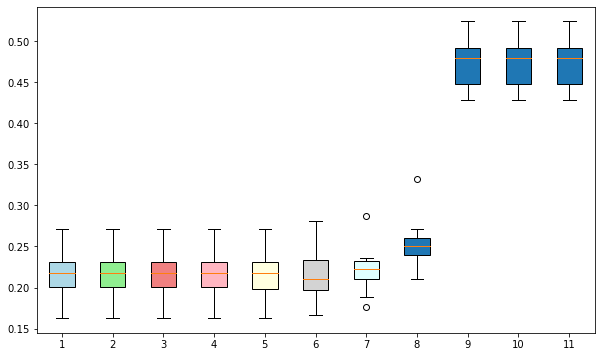

In [73]:
# Crear un gráfico con 10 boxplots
fig, ax = plt.subplots(figsize=(10, 6))
# Recopilar todas las distribuciones de MSE
mse_data = [ecm_part['MSE'].values for ecm_part in dist_ecm_lasso]

# Crear los boxplots y agregarlos al gráfico
boxplots = ax.boxplot(mse_data, patch_artist=True)

# Personalizar los colores de los boxplots
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow', 'lightgray', 'lightcyan', 'lightmagenta', 'lightsalmon', 'lightseagreen']
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)
# Lista de etiquetas para los boxplots
ax.xaxis.set(ticklabels=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000])
# Configurar el gráfico
ax.set(title='Distribuciones de MSE, según el parámetro lambda', xlabel='Lambdas', ylabel='MSE')



ValueError: Invalid RGBA argument: 'lightmagenta'

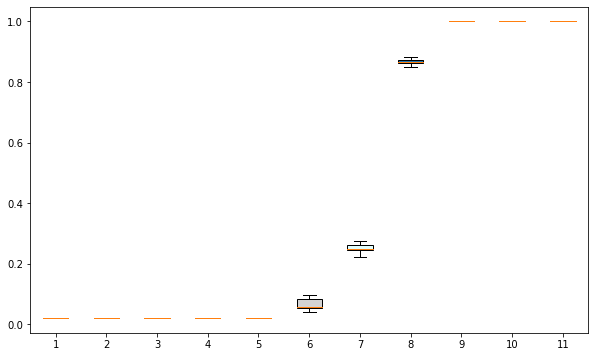

In [92]:

# Crear un gráfico con 10 boxplots
fig, ax = plt.subplots(figsize=(10, 6))

# Recopilar todas las distribuciones de MSE
prop_data = [prop_part['proporcion_variables_cero'].values for prop_part in dist_prop_lasso]

# Crear los boxplots y agregarlos al gráfico
boxplots = ax.boxplot(prop_data, patch_artist=True)

# Personalizar los colores de los boxplots
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow', 'lightgray', 'lightcyan', 'lightmagenta', 'lightsalmon', 'lightseagreen']
for patch, color in zip(boxplots['boxes'], colors):
    patch.set_facecolor(color)
# Lista de etiquetas para los boxplots
ax.xaxis.set(ticklabels=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000])
# Configurar el gráfico
ax.set(title='Distribuciones de proporción de coeficientes estimados iguales a 0, según el parámetro lambda', xlabel='Lambdas', ylabel='MSE')

##### ¿Qué variables estamos excluyendo bajo el Lambda óptimo en LASSO?

In [97]:
mejor_lambda_lasso

1.0

In [101]:
# Definir el modelo
modelo = LogisticRegression(penalty='l1', C=1, solver='liblinear')
# Usar la función evalua_metodo
resultados = evalua_metodo(modelo, X_train, y_train, X_test, y_test, plot=False,coef=True)
print(resultados)

AUC: 0.6804
Confusion Matrix:
[[109  16]
 [ 46  44]]
Accuracy Score: 0.7116279069767442
{'AUC': 0.6804444444444445, 'Confusion Matrix': array([[109,  16],
       [ 46,  44]], dtype=int64), 'Accuracy Score': 0.7116279069767442, 'ECM': 0.28837209302325584, 'Coeficientes': {'const': 1.3393862403818013, 'PassengerId': 0.00016395057570210532, 'Pclass': -1.0466542181015386, 'Age': -0.037867903178312845, 'SibSp': -0.26979376250427334, 'Parch': 0.19524307555092232, 'Fare': 0.0036912711748675235}, 'Proporción de Variables con Coeficiente Cero': 0.0}


#### No excluimos ninguna variable bajo el lambda óptimo.

In [104]:
# Definir el modelo
modelo = LogisticRegression(max_iter=10000)
# Usar la función evalua_metodo
resultados = evalua_metodo(modelo, X_train, y_train, X_test, y_test, plot=False,coef=True)
print(resultados)

AUC: 0.6860
Confusion Matrix:
[[109  16]
 [ 45  45]]
Accuracy Score: 0.7162790697674418
{'AUC': 0.686, 'Confusion Matrix': array([[109,  16],
       [ 45,  45]], dtype=int64), 'Accuracy Score': 0.7162790697674418, 'ECM': 0.2837209302325581, 'Coeficientes': {'const': -2.066067723913618e-06, 'PassengerId': 8.676724356325793e-05, 'Pclass': -1.1406481559102466, 'Age': -0.04189853648368399, 'SibSp': -0.30073653186656, 'Parch': 0.2195041580175166, 'Fare': 0.0028205775731193175}, 'Proporción de Variables con Coeficiente Cero': 0.0}


## Ejercicio 6

In [ ]:
## Respondemos esto en el reporte

## Ejercicio 7

In [ ]:
## No se si hacer full texto o si correr algo aqui

## Ejercicio 8

In [ ]:
## No se si hacer full texto o si correr algo aqui

## Ejercicio 9

In [ ]:
#Con el metodo que seleccionaron, predigan qué personas son pobres dentro de la base norespondieron. ¿Qu´e proporci´on de los hogares son pobres en esa
#submuestra?